 <span style="color:#42a5f5; font-size:2em; font-weight:bold;">Jointure des données d'incidents et de mobilisations</span>

 <span style="font-weight:bold">Ce notebook à pour but d'explorer et de réaliser une jointure entre les données de  mobilisations et d'incidents !</span>

<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 1. Import des données précedemment chargées et nettoyées</span>

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
# Supprimer les warnings pour une meilleure lisibilité
warnings.filterwarnings("ignore")

In [2]:
# Chargement avec typage explicite et parsing des dates pour eviter le changement par pandas comme observé dans un precedent test
# Chargement des données incidents et mobilisations
incidents_dtypes = {
    "IncidentNumber": str, "CalYear": "Int64", "HourOfCall": "Int64", "IncidentGroup": str,
    "StopCodeDescription": str, "SpecialServiceType": str, "PropertyCategory": str,
    "PropertyType": str, "AddressQualifier": str, "Postcode_full": str,
    "Postcode_district": str, "UPRN": str, "USRN": str,
    "IncGeo_BoroughCode": str, "IncGeo_BoroughName": str, "ProperCase": str,
    "IncGeo_WardCode": str, "IncGeo_WardName": str, "IncGeo_WardNameNew": str,
    "Easting_m": "Int64", "Northing_m": "Int64", "Easting_rounded": "Int64", "Northing_rounded": "Int64",
    "Latitude": str, "Longitude": str, "FRS": str, "IncidentStationGround": str,
    "FirstPumpArriving_AttendanceTime": "Int64", "FirstPumpArriving_DeployedFromStation": str,
    "SecondPumpArriving_AttendanceTime": "Int64", "SecondPumpArriving_DeployedFromStation": str,
    "NumStationsWithPumpsAttending": "Int64", "NumPumpsAttending": "Int64", "PumpCount": "int64",
    "PumpMinutesRounded": "int64", "NotionalCost": "int64", "NumCalls": "Int64"
}

mobilisations_dtypes = { "IncidentNumber": str, "CalYear": "Int64", "BoroughName": str, "WardName": str, "HourOfCall": "Int64", "ResourceMobilisationId": "int64", "Resource_Code": str,
    "PerformanceReporting": str, "TurnoutTimeSeconds": "Int64", "TravelTimeSeconds": "Int64",
    "AttendanceTimeSeconds": "Int64", "DeployedFromStation_Code": str, "DeployedFromStation_Name": str,
    "DeployedFromLocation": str, "PumpOrder": "Int64", "PlusCode_Code": str,
    "PlusCode_Description": str, "DelayCodeId": "Int64", "DelayCode_Description": str }

# Parsing dates
date_cols_incidents = ["DateOfCall"]
date_cols_mobilisations = ["DateAndTimeMobilised", "DateAndTimeMobile", "DateAndTimeArrived", "DateAndTimeLeft", "DateAndTimeReturned"]

# Chargement des CSV nettoyés
df_incidents = pd.read_csv("../../data/raw/Cleaned_data/InUSE/cleaned_data_incidents.csv", dtype=incidents_dtypes, parse_dates=date_cols_incidents)
df_mobilisations = pd.read_csv("../../data/raw/Cleaned_data/InUSE/cleaned_data_mobilisations.csv", dtype=mobilisations_dtypes, parse_dates=date_cols_mobilisations)

In [3]:
#Vérification des datas pour formater la clé de jointure IncidentNumber comme il faut :
print("Données incidents clean chargées:")
display(df_incidents)
print("Données mobilisations clean chargées:") 
display(df_mobilisations)

print("Période des données d'incidents : De", min(df_incidents["DateOfCall"]), "à", max(df_incidents["DateOfCall"]))
print("Période des données de mobilisations : De", min(df_mobilisations["DateAndTimeMobilised"]), "à", max(df_mobilisations["DateAndTimeMobilised"]))

print("Vérification taille=> Incidents :", len(df_incidents), " | Mobilisations :", len(df_mobilisations))

print("Incidents - Clés uniques :", df_incidents["IncidentNumber"].nunique())
print("Mobilisations - Clés uniques :", df_mobilisations["IncidentNumber"].nunique())

print("Vérification doublons dans incidents :", df_incidents["IncidentNumber"].duplicated().sum())
print("Vérification doublons dans mobilisations :", df_mobilisations["IncidentNumber"].duplicated().sum())

print("NAs dans incidents :", df_incidents["IncidentNumber"].isna().sum())
print("NAs dans mobilisations :", df_mobilisations["IncidentNumber"].isna().sum())

Données incidents clean chargées:


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,NotionalCost,NumCalls
0,235138081.00,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319,Battersea,342,Clapham,2,2,2,60,255,1
1,1091.00,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,<NA>,NaN,<NA>,NaN,<NA>,<NA>,1,60,255,1
2,2091.00,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308,Edmonton,<NA>,NaN,1,1,1,60,255,2
3,3091.00,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210,Hillingdon,<NA>,NaN,1,1,1,60,255,2
4,5091.00,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233,Holloway,250,Holloway,1,2,2,60,255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824968,054201-31032025,2025-03-31,2025,23:39:44,23,False Alarm,AFA,NaN,Non Residential,Shopping Centre,...,264,Hammersmith,247,Hammersmith,2,3,3,60,430,2
1824969,054203-31032025,2025-03-31,2025,23:40:09,23,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,229,Holloway,<NA>,NaN,1,1,1,60,430,1
1824970,054204-31032025,2025-03-31,2025,23:42:16,23,Special Service,Special Service,Effecting entry/exit,Dwelling,Licensed House in Multiple Occupation - Up to ...,...,373,Harrow,<NA>,NaN,1,1,1,60,430,1
1824971,054205-31032025,2025-03-31,2025,23:42:42,23,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,367,East Ham,412,Stratford,2,2,2,60,430,2


Données mobilisations clean chargées:


,IncidentNumber,CalYear,BoroughName,WardName,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000004-01012025,2025,HAMMERSMITH AND FULHAM,FULHAM REACH,0,6862256,H331,2,2025-01-01 00:02:00,2025-01-01 00:07:00,...,2025-01-01 00:23:00,NaT,H33,Wandsworth,Home Station,2,Initial,Initial Mobilisation,12,Not held up
1,000004-01012025,2025,HAMMERSMITH AND FULHAM,FULHAM REACH,0,6862257,G261,1,2025-01-01 00:02:00,2025-01-01 00:02:00,...,2025-01-01 00:38:00,NaT,G36,Hammersmith,Other Station,1,Initial,Initial Mobilisation,12,Not held up
2,000005-01012025,2025,MERTON,WEST BARNES,0,6862259,H401,1,2025-01-01 00:03:00,2025-01-01 00:04:00,...,2025-01-01 00:11:00,NaT,H40,New Malden,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN
3,000006-01012025,2025,CROYDON,PURLEY OAKS & RIDDLESDOWN,0,6862260,H291,1,2025-01-01 00:04:00,2025-01-01 00:06:00,...,2025-01-01 00:25:00,NaT,H29,Purley,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN
4,000007-01012025,2025,BARNET,BURNT OAK,0,6862261,G222,1,2025-01-01 00:05:00,2025-01-01 00:06:00,...,2025-01-01 00:27:00,NaT,G22,Stanmore,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578271,221555-30122024,2024,KINGSTON UPON THAMES,COOMBE VALE,23,6861269,H391,2,2024-12-30 23:47:00,2024-12-30 23:49:00,...,2024-12-30 23:56:00,NaT,H39,Surbiton,Home Station,2,Initial,Initial Mobilisation,9,"Traffic, roadworks, etc"
2578272,221556-30122024,2024,ISLINGTON,FINSBURY PARK,23,6861270,A311,1,2024-12-30 23:48:00,2024-12-30 23:49:00,...,2024-12-31 00:16:00,NaT,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN
2578273,221556-30122024,2024,ISLINGTON,FINSBURY PARK,23,6861271,F321,2,2024-12-30 23:48:00,2024-12-30 23:49:00,...,2024-12-31 00:04:00,NaT,F32,Stoke Newington,Home Station,2,Initial,Initial Mobilisation,12,Not held up
2578274,221557-30122024,2024,KENSINGTON AND CHELSEA,ROYAL HOSPITAL,23,6861272,G341,1,2024-12-30 23:59:00,2024-12-31 00:01:00,...,2024-12-31 00:39:00,NaT,G34,Chelsea,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN


Période des données d'incidents : De 2009-01-01 00:00:00 à 2025-03-31 00:00:00
Période des données de mobilisations : De 2009-01-01 00:02:00 à 2025-12-04 23:51:00
Vérification taille=> Incidents : 1824973  | Mobilisations : 2578276
Incidents - Clés uniques : 1824973
Mobilisations - Clés uniques : 1703375
Vérification doublons dans incidents : 0
Vérification doublons dans mobilisations : 874901
NAs dans incidents : 0
NAs dans mobilisations : 0


In [4]:
print (" Vérifiersi cette valeur 9091.00 de IncidentNumber existe dans les mobilisations : ",
df_mobilisations[df_mobilisations["IncidentNumber"] == "9091.00"].shape[0] > 0)

 Vérifiersi cette valeur 9091.00 de IncidentNumber existe dans les mobilisations :  False


 <span style= " font-weight:bold">Pas de format avec .00 à priori  dans les mobilisations à vérifier ! </span>

In [5]:
print(" y a til des valeurs contenant des - dans IncidentNumber dans les mobilisations ? ",
df_mobilisations["IncidentNumber"].str.contains(r'[-]').any())
print(" y a til des valeurs contenant des - dans IncidentNumber dans les incidents ?",
df_incidents["IncidentNumber"].str.contains(r'[-]').any())

print(" y a til des valeurs contenant des _ dans IncidentNumber dans les mobilisations ? ",
df_mobilisations["IncidentNumber"].str.contains(r'[_]').any())
print(" y a til des valeurs contenant des _ dans IncidentNumber dans les incidents ? ",
df_incidents["IncidentNumber"].str.contains(r'[_]').any())

print(" y a til des valeurs contenant des . dans IncidentNumber dans les mobilisations ? ",
df_mobilisations["IncidentNumber"].str.contains(r'[.]').any())
print(" y a til des valeurs contenant des . dans IncidentNumber dans les incidents ? ", 
df_incidents["IncidentNumber"].str.contains(r'[.]').any())

print (" y atil des valeurs dIncidentNumber dans les mobilisations qui ne contiennent aucun - ni _ ni . ? ",
df_mobilisations[~df_mobilisations["IncidentNumber"].str.contains(r'[-_.]')]["IncidentNumber"].any())
print (" y atil des valeurs dIncidentNumber dans les incidents qui ne contiennent aucun - ni _ ni . ? ",
df_incidents[~df_incidents["IncidentNumber"].str.contains(r'[-_.]')]["IncidentNumber"].any())

print(" donne des exemples de valeurs contenant des -, _ et . dans IncidentNumber dans les mobilisations ?",)
print(df_mobilisations[df_mobilisations["IncidentNumber"].str.contains(r'[-_.]')]["IncidentNumber"].unique())
print(" donne des exemples de valeurs contenant des -, _ et . dans IncidentNumber dans les incidents ? ",)
print(df_incidents[df_incidents["IncidentNumber"].str.contains(r'[-_.]')]["IncidentNumber"].unique())


print(" quels sont tous les fotmats  de texte possible des valeurs d'IncidentNumber dans les mobilisations ? " ,df_mobilisations["IncidentNumber"].unique())
print(" quels sont tous les fotmats possible de IncidentNumber dans les incidents ?",
df_incidents["IncidentNumber"].unique())

 y a til des valeurs contenant des - dans IncidentNumber dans les mobilisations ?  True
 y a til des valeurs contenant des - dans IncidentNumber dans les incidents ? True
 y a til des valeurs contenant des _ dans IncidentNumber dans les mobilisations ?  False
 y a til des valeurs contenant des _ dans IncidentNumber dans les incidents ?  False
 y a til des valeurs contenant des . dans IncidentNumber dans les mobilisations ?  False
 y a til des valeurs contenant des . dans IncidentNumber dans les incidents ?  True
 y atil des valeurs dIncidentNumber dans les mobilisations qui ne contiennent aucun - ni _ ni . ?  True
 y atil des valeurs dIncidentNumber dans les incidents qui ne contiennent aucun - ni _ ni . ?  False
 donne des exemples de valeurs contenant des -, _ et . dans IncidentNumber dans les mobilisations ?
['000004-01012025' '000005-01012025' '000006-01012025' ...
 '221556-30122024' '221557-30122024' '221558-30122024']
 donne des exemples de valeurs contenant des -, _ et . dans In

 <span style="font-weight:bold">OK, donc de ça concretement on devrait avoir des formats avec trets et pts dans incidents et formats avec tirets mais pas de pts dans mobilisations ==> Implémentation d'une fonction pour vérification appropriée ! </span>

In [6]:
def analyze_incident_number_formats(df, df_name):
    """Analyse les différents formats de la colonne IncidentNumber dans un DataFrame."""
    print(f" Analyse des formats de 'IncidentNumber' dans {df_name} ")

    # Gérer les NaN en les transformant en chaîne vide pour ne pas causer d'erreurs avec .contains()
    incident_numbers = df["IncidentNumber"].astype(str).fillna('')

    # stocker les formats et des exemples
    formats_found = {}
    # Liste pour stocker le type de format pour chaque IncidentNumber, pour le calcul exact
    all_format_types = []

    for num in incident_numbers: 
        has_dash = '-' in num
        has_underscore = '_' in num
        has_dot = '.' in num
        # Définir le "type" de format basé sur la présence des caractères
        if has_dash and has_underscore and has_dot:
            format_type = "Contient -, _ et ."
        elif has_dash and has_underscore:
            format_type = "Contient - et _"
        elif has_dash and has_dot:
            format_type = "Contient - et ."
        elif has_underscore and has_dot:
            format_type = "Contient _ et ."
        elif has_dash:
            format_type = "Contient seulement -"
        elif has_underscore:
            format_type = "Contient seulement _"
        elif has_dot:
            format_type = "Contient seulement ."
        else:
            format_type = "Ne contient ni -, ni _, ni ."

        # Ajouter l'exemple s'il n'y en a pas encore 5 pour ce type de format
        if format_type not in formats_found:
            formats_found[format_type] = []
        if len(formats_found[format_type]) < 5:
            formats_found[format_type].append(num)
            
        all_format_types.append(format_type)


    # Afficher les exemples par format
    print(f"Total de {len(incident_numbers)} entrées à analyser.")

    for format_type, examples in formats_found.items():
        print(f"\nFormat: '{format_type}'")
        print(f"  Exemples: {', '.join(examples)}")

    # Pour obtenir un compte exact, all_format_types
    print("\nRépartition exacte des formats (comptes) :")
    # Convertir la liste des types de formats en une Series Pandas pour utiliser value_counts
    exact_counts = pd.Series(all_format_types).value_counts()
    print(exact_counts)

# Analyser le format dans les deux DF
analyze_incident_number_formats(df_incidents, "df_incidents")
analyze_incident_number_formats(df_mobilisations, "df_mobilisations")


 Analyse des formats de 'IncidentNumber' dans df_incidents 
Total de 1824973 entrées à analyser.

Format: 'Contient seulement .'
  Exemples: 235138081.00, 1091.00, 2091.00, 3091.00, 5091.00

Format: 'Contient seulement -'
  Exemples: 162970-23112015, 160003-17112015, 160002-17112015, 160005-17112015, 160006-17112015

Répartition exacte des formats (comptes) :
Contient seulement -    1056755
Contient seulement .     768218
Name: count, dtype: int64
 Analyse des formats de 'IncidentNumber' dans df_mobilisations 
Total de 2578276 entrées à analyser.

Format: 'Contient seulement -'
  Exemples: 000004-01012025, 000004-01012025, 000005-01012025, 000006-01012025, 000007-01012025

Format: 'Ne contient ni -, ni _, ni .'
  Exemples: 1151, 1151, 4151, 8151, 10151

Répartition exacte des formats (comptes) :
Contient seulement -            1560587
Ne contient ni -, ni _, ni .    1017689
Name: count, dtype: int64


<spanD style="font-weight:bold"> Donc il faut formater que .00 dans incident et laisser le reste telquel ! pour le formatage de IncidentNumber_clean </span>

In [7]:
cols_incidents = set(df_incidents.columns)
cols_mobilisations = set(df_mobilisations.columns)
common_columns = cols_incidents.intersection(cols_mobilisations)

print("Colonnes communes :")
for col_name in sorted(common_columns):
    print(f"- {col_name}")

print(f"Nombre de colonnes communes : {len(common_columns)}")

print("\nVérification des types de données dans incidents :")
for col in df_incidents.columns:
    print(f"{col}: {df_incidents[col].dtype}")
    
print("\nVérification des types de données dans mobilisations :")
for col in df_mobilisations.columns:
    print(f"{col}: {df_mobilisations[col].dtype}")
    
print("\nVérification des doublons dans les colonnes communes :")
for col in common_columns:
    if df_incidents[col].duplicated().any() or df_mobilisations[col].duplicated().any():
        print(f"Colonne {col} a des doublons dans au moins un des DataFrames.")
    else:
        print(f"Colonne {col} n'a pas de doublons dans les deux DataFrames.")
        
print("\nVérification des valeurs uniques dans les colonnes communes :")
for col in common_columns:
    unique_incidents = df_incidents[col].nunique()
    unique_mobilisations = df_mobilisations[col].nunique()
    print(f"Colonne {col} - Incidents: {unique_incidents} uniques, Mobilisations: {unique_mobilisations} uniques")

Colonnes communes :
- CalYear
- HourOfCall
- IncidentNumber
Nombre de colonnes communes : 3

Vérification des types de données dans incidents :
IncidentNumber: object
DateOfCall: datetime64[ns]
CalYear: Int64
TimeOfCall: object
HourOfCall: Int64
IncidentGroup: object
StopCodeDescription: object
SpecialServiceType: object
PropertyCategory: object
PropertyType: object
AddressQualifier: object
Postcode_full: object
Postcode_district: object
UPRN: object
USRN: object
IncGeo_BoroughCode: object
IncGeo_BoroughName: object
ProperCase: object
IncGeo_WardCode: object
IncGeo_WardName: object
IncGeo_WardNameNew: object
Easting_m: Int64
Northing_m: Int64
Easting_rounded: Int64
Northing_rounded: Int64
Latitude: object
Longitude: object
FRS: object
IncidentStationGround: object
FirstPumpArriving_AttendanceTime: Int64
FirstPumpArriving_DeployedFromStation: object
SecondPumpArriving_AttendanceTime: Int64
SecondPumpArriving_DeployedFromStation: object
NumStationsWithPumpsAttending: Int64
NumPumpsAttend

In [8]:
# Fonction pour nettoyer les valeurs d'IncidentNumber en fonction des formats constatés
# La fonction de nettoyage adaptée
import re # expressions regulieres

def clean_incident_number(val):
    if pd.isna(val):
        return None
    val = str(val).strip()
    val = re.sub(r'\.0+$', '', val) # Remplace ".0", ".00", ".000" etc par vide
    return val

# Appliquer la fonction de nettoyage aux deux DF
df_incidents["IncidentNumber_clean"] = df_incidents["IncidentNumber"].apply(clean_incident_number)
df_mobilisations["IncidentNumber_clean"] = df_mobilisations["IncidentNumber"].apply(clean_incident_number)

# Filtrage pour garder uniquement les clés propres et réinitialisation des index après filtrage
df_incidents = df_incidents[df_incidents["IncidentNumber_clean"].notna()].reset_index(drop=True)
df_mobilisations = df_mobilisations[df_mobilisations["IncidentNumber_clean"].notna()].reset_index(drop=True)

In [9]:
# Analyse des formats des colonnes nettoyées 
def analyze_cleaned_formats(df, df_name):
    print(f"\nAnalyse des formats de 'IncidentNumber_clean' dans {df_name}")
    cleaned_numbers = df["IncidentNumber_clean"].astype(str).fillna('')
    
    all_format_types = []
    formats_found_examples = {}

    for num in cleaned_numbers:
        has_dash = '-' in num
        has_underscore = '_' in num
        has_dot = '.' in num # Devrait être False pour la plupart après ce nettoyage

        if has_dash and has_underscore and has_dot:
            format_type = "Contient -, _ et ."
        elif has_dash and has_underscore:
            format_type = "Contient - et _"
        elif has_dash and has_dot:
            format_type = "Contient - et ."
        elif has_underscore and has_dot:
            format_type = "Contient _ et ."
        elif has_dash:
            format_type = "Contient seulement -"
        elif has_underscore:
            format_type = "Contient seulement _"
        elif has_dot:
            format_type = "Contient seulement ."
        else:
            format_type = "Ne contient ni -, ni _, ni ."
            
        all_format_types.append(format_type)
        if format_type not in formats_found_examples:
            formats_found_examples[format_type] = []
        if len(formats_found_examples[format_type]) < 5:
            formats_found_examples[format_type].append(num)

    print(f"Total de {len(cleaned_numbers)} entrées à analyser.")
    for format_type, examples in formats_found_examples.items():
        print(f"\nFormat: '{format_type}'")
        print(f"  Exemples: {', '.join(examples)}")
    
    print("\nRépartition exacte des formats (comptes) :")
    exact_counts = pd.Series(all_format_types).value_counts()
    print(exact_counts)

analyze_cleaned_formats(df_incidents, "df_incidents")
analyze_cleaned_formats(df_mobilisations, "df_mobilisations")


Analyse des formats de 'IncidentNumber_clean' dans df_incidents
Total de 1824973 entrées à analyser.

Format: 'Ne contient ni -, ni _, ni .'
  Exemples: 235138081, 1091, 2091, 3091, 5091

Format: 'Contient seulement -'
  Exemples: 162970-23112015, 160003-17112015, 160002-17112015, 160005-17112015, 160006-17112015

Répartition exacte des formats (comptes) :
Contient seulement -            1056755
Ne contient ni -, ni _, ni .     768218
Name: count, dtype: int64

Analyse des formats de 'IncidentNumber_clean' dans df_mobilisations
Total de 2578276 entrées à analyser.

Format: 'Contient seulement -'
  Exemples: 000004-01012025, 000004-01012025, 000005-01012025, 000006-01012025, 000007-01012025

Format: 'Ne contient ni -, ni _, ni .'
  Exemples: 1151, 1151, 4151, 8151, 10151

Répartition exacte des formats (comptes) :
Contient seulement -            1560587
Ne contient ni -, ni _, ni .    1017689
Name: count, dtype: int64


<span style="font-weight:bold">
Si :

- '235138081.00' devient '235138081'
- '054204-31032025.00' devient '054204-31032025'
- '123456.789' reste '123456.789' (si ce format existait)
- '000004-01012025' reste '000004-01012025'
</span>

In [10]:
df_inner = df_incidents.merge(
    df_mobilisations,
    how="inner",
    on="IncidentNumber_clean",
    suffixes=("_incident", "_mobilisation")
)

print(f"Jointure INNER : {df_inner.shape[0]} lignes")
print(f"Taux de jointure réussie :  {len(df_inner) / len(df_mobilisations):.2%}")

#vérifications du type de données après jointure
print("\nTypes de données après jointure :")
for col in df_inner.columns:
    print(f"{col}: {df_inner[col].dtype}")

# Statistiques sur les mobilisations   
mobilisations_per_incident = df_mobilisations["IncidentNumber_clean"].value_counts()
print("Nb moyen de mobilisations par incident :", mobilisations_per_incident.mean())
print("Nb max de mobilisations pour un incident :", mobilisations_per_incident.max())
print("Nb min de mobilisations pour un incident :", mobilisations_per_incident.min())

Jointure INNER : 2553955 lignes
Taux de jointure réussie :  99.06%

Types de données après jointure :
IncidentNumber_incident: object
DateOfCall: datetime64[ns]
CalYear_incident: Int64
TimeOfCall: object
HourOfCall_incident: Int64
IncidentGroup: object
StopCodeDescription: object
SpecialServiceType: object
PropertyCategory: object
PropertyType: object
AddressQualifier: object
Postcode_full: object
Postcode_district: object
UPRN: object
USRN: object
IncGeo_BoroughCode: object
IncGeo_BoroughName: object
ProperCase: object
IncGeo_WardCode: object
IncGeo_WardName: object
IncGeo_WardNameNew: object
Easting_m: Int64
Northing_m: Int64
Easting_rounded: Int64
Northing_rounded: Int64
Latitude: object
Longitude: object
FRS: object
IncidentStationGround: object
FirstPumpArriving_AttendanceTime: Int64
FirstPumpArriving_DeployedFromStation: object
SecondPumpArriving_AttendanceTime: Int64
SecondPumpArriving_DeployedFromStation: object
NumStationsWithPumpsAttending: Int64
NumPumpsAttending: Int64
Pump

Moyenne : 1,5 mobilisations / incident
Cela confirme que chaque incident génère en moyenne près de 2 mobilisations différentes ( station de deploiment differentes == equipe differentes, trajet different etc).
Maximum : 52 mobilisations pour un seul incident
vu sous cet angle la jointure est du type one to many : 1 incidents à plusieurs mobilisations. avec la validation suivante: une mob n'a qu'un incident !

In [11]:
display(df_inner.describe())

,DateOfCall,CalYear_incident,HourOfCall_incident,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,...,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,PumpOrder,DelayCodeId
count,2553955,2553955.0,2553955.0,1152341.0,1152341.0,2553955.0,2553955.0,2553948.0,1520437.0,2553955.0,...,1447995,1434530,1447952,2525184.0,2525085.0,2553955.0,1428559,386012,2553955.0,632769.0
mean,2017-06-07 13:24:06.319140864,2016.932946,13.462031,530564.099359,180376.757633,530566.970933,180471.668941,311.137299,391.162382,1.687404,...,2019-02-21 08:17:05.306909952,2019-03-06 07:58:39.383310336,2019-02-21 09:15:36.934042112,79.323703,274.591257,352.240004,2019-04-05 11:53:19.957858560,2012-02-07 04:56:18.308756992,1.463245,10.495533
min,2009-01-01 00:00:00,2009.0,0.0,503582.0,155901.0,503550.0,155950.0,1.0,1.0,1.0,...,2009-01-01 00:02:00,2009-01-01 00:06:00,2009-01-01 00:07:00,0.0,0.0,0.0,2009-01-01 00:11:00,2009-01-01 00:12:00,1.0,3.0
25%,2013-01-08 00:00:00,2013.0,9.0,525187.0,176015.0,525250.0,176150.0,229.0,294.0,1.0,...,2015-02-08 22:37:00,2015-03-08 05:06:15,2015-02-08 23:11:45,54.0,174.0,252.0,2015-05-10 23:47:30,2010-05-12 08:14:30,1.0,9.0
50%,2017-09-13 00:00:00,2017.0,14.0,530803.0,180985.0,530850.0,181050.0,291.0,366.0,1.0,...,2021-02-25 11:59:00,2021-03-06 20:01:30,2021-02-25 12:41:00,73.0,248.0,327.0,2021-03-22 13:59:00,2011-12-08 10:53:00,1.0,12.0
75%,2021-11-09 00:00:00,2021.0,19.0,536682.0,184961.0,536150.0,185150.0,369.0,458.0,2.0,...,2023-04-02 07:16:00,2023-04-05 17:30:45,2023-04-02 07:20:15,96.0,344.0,423.0,2023-04-12 11:55:30,2013-09-06 22:03:00,2.0,12.0
max,2025-03-31 00:00:00,2025.0,23.0,561126.0,200906.0,561150.0,200950.0,1200.0,1200.0,46.0,...,2025-12-03 23:56:00,2025-12-03 23:58:00,2025-12-03 23:59:00,1192.0,1198.0,1200.0,2025-12-03 23:59:00,2015-12-11 23:53:00,13.0,13.0
std,NaN,4.889124,6.33265,10289.859499,7349.89032,9628.24443,7286.121215,129.807059,149.330719,0.953631,...,NaN,NaN,NaN,44.271885,150.557462,153.44844,NaN,NaN,0.780704,2.187251


In [12]:
print("Liste des incidents avec le plus de mobilisations :", mobilisations_per_incident[mobilisations_per_incident == mobilisations_per_incident.max()])
print("\nListe des incidents avec le moins de mobilisations :",mobilisations_per_incident[mobilisations_per_incident == mobilisations_per_incident.min()])

print("\nVérification des doublons dans les données jointes :")
print("Nombre de doublons dans les données jointes :", df_inner.duplicated().sum())

print("\nVérification des valeurs uniques dans les données jointes :")
for col in df_inner.columns:
    unique_count = df_inner[col].nunique()
    print(f"Colonne {col} - {unique_count} valeurs uniques")

Liste des incidents avec le plus de mobilisations : IncidentNumber_clean
084944-29052024    52
Name: count, dtype: int64

Liste des incidents avec le moins de mobilisations : IncidentNumber_clean
221558-30122024    1
000007-01012025    1
000010-01012025    1
000024-01012025    1
000026-01012025    1
                  ..
221548-30122024    1
221544-30122024    1
221549-30122024    1
221551-30122024    1
221533-30122024    1
Name: count, Length: 1043003, dtype: int64

Vérification des doublons dans les données jointes :
Nombre de doublons dans les données jointes : 4213

Vérification des valeurs uniques dans les données jointes :
Colonne IncidentNumber_incident - 1686202 valeurs uniques
Colonne DateOfCall - 5930 valeurs uniques
Colonne CalYear_incident - 17 valeurs uniques
Colonne TimeOfCall - 86392 valeurs uniques
Colonne HourOfCall_incident - 24 valeurs uniques
Colonne IncidentGroup - 3 valeurs uniques
Colonne StopCodeDescription - 9 valeurs uniques
Colonne SpecialServiceType - 21 vale

In [13]:
no_mobilisations = df_incidents[~df_incidents["IncidentNumber_clean"].isin(df_mobilisations["IncidentNumber_clean"])]
print("Vérification combien d'incidents sans mobilisations :")
print(f"Nombre d'incidents sans mobilisations : {len(no_mobilisations)}")
print("Liste des incidents sans mobilisations :")
display(no_mobilisations.head(10))

no_incidents = df_mobilisations[~df_mobilisations["IncidentNumber_clean"].isin(df_incidents["IncidentNumber_clean"])]
print("\nVérification combien de mobilisations sans incidents :")
print(f"Nombre de mobilisations sans incidents : {len(no_incidents)}")
print("Liste des mobilisations sans incidents :")
display(no_incidents.head(10))

Vérification combien d'incidents sans mobilisations :
Nombre d'incidents sans mobilisations : 138771
Liste des incidents sans mobilisations :


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,NotionalCost,NumCalls,IncidentNumber_clean
1,1091.00,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,<NA>,NaN,<NA>,<NA>,1,60,255,1,1091
10,12091.00,2009-01-01,2009,00:16:02,0,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,NaN,<NA>,NaN,2,2,2,119,506,1,12091
19,32091.00,2009-01-01,2009,00:30:50,0,Special Service,Special Service,No action (not false alarm),Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,NaN,<NA>,NaN,1,1,1,60,255,1,32091
21,36091.00,2009-01-01,2009,00:32:42,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,NaN,<NA>,NaN,1,1,1,60,255,3,36091
39,66091.00,2009-01-01,2009,01:08:27,1,False Alarm,AFA,NaN,Dwelling,House in Multiple Occupation - 3 or more store...,...,NaN,<NA>,NaN,<NA>,<NA>,1,60,255,1,66091
45,88091.00,2009-01-01,2009,01:20:44,1,False Alarm,False alarm - Malicious,NaN,Non Residential,Casino,...,NaN,<NA>,NaN,2,2,2,60,255,2,88091
47,89091.00,2009-01-01,2009,01:21:20,1,Special Service,Special Service,Effecting entry/exit,Outdoor Structure,Kiosk,...,NaN,<NA>,NaN,1,1,1,60,255,1,89091
72,145091.00,2009-01-01,2009,03:15:02,3,Special Service,Special Service,Flooding,Other Residential,Student Hall of Residence,...,NaN,<NA>,NaN,1,1,1,60,255,1,145091
90,172091.00,2009-01-01,2009,04:15:15,4,Special Service,Special Service,RTC,Road Vehicle,Car,...,NaN,<NA>,NaN,<NA>,<NA>,1,60,255,1,172091
100,188091.00,2009-01-01,2009,05:02:32,5,Fire,Primary Fire,NaN,Road Vehicle,Car,...,NaN,<NA>,NaN,1,1,1,60,255,5,188091



Vérification combien de mobilisations sans incidents :
Nombre de mobilisations sans incidents : 24321
Liste des mobilisations sans incidents :


,IncidentNumber,CalYear,BoroughName,WardName,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,...,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,IncidentNumber_clean
1149,001420-02012025,2025,NaN,NaN,21,6863819,F362,2,2025-02-01 21:37:00,2025-02-01 21:38:00,...,NaT,F36,Walthamstow,Home Station,2,Initial,Initial Mobilisation,12,Not held up,001420-02012025
1150,001420-02012025,2025,NaN,NaN,21,6863820,F361,1,2025-02-01 21:37:00,2025-02-01 21:39:00,...,NaT,F36,Walthamstow,Home Station,1,Initial,Initial Mobilisation,12,Not held up,001420-02012025
1335,001567-03012025,2025,NaN,NaN,6,6864061,H391,1,2025-03-01 06:23:00,2025-03-01 06:24:00,...,NaT,H39,Surbiton,Home Station,1,Initial,Initial Mobilisation,12,Not held up,001567-03012025
3137,003399-05012025,2025,NaN,NaN,21,6866504,E421,1,2025-05-01 21:52:00,2025-05-01 21:54:00,...,NaT,E42,Biggin Hill,Home Station,1,Initial,Initial Mobilisation,12,Not held up,003399-05012025
3528,003814-06012025,2025,NaN,NaN,15,6866985,H291,1,2025-06-01 15:20:00,2025-06-01 15:20:00,...,NaT,H29,Purley,Home Station,1,Initial,Initial Mobilisation,12,Not held up,003814-06012025
3570,003859-06012025,2025,NaN,NaN,16,6867043,G401,1,2025-06-01 16:35:00,2025-06-01 16:36:00,...,NaT,G40,Hayes,Home Station,1,Initial,Initial Mobilisation,5,Address incomplete/wrong,003859-06012025
3648,003932-06012025,2025,NaN,NaN,19,6867147,F351,1,2025-06-01 19:05:00,2025-06-01 19:06:00,...,NaT,F35,Woodford,Home Station,1,Initial,Initial Mobilisation,12,Not held up,003932-06012025
4483,004772-08012025,2025,NaN,NaN,10,6868304,H291,1,2025-08-01 10:29:00,2025-08-01 10:29:00,...,NaT,H29,Purley,Home Station,1,Initial,Initial Mobilisation,12,Not held up,004772-08012025
4856,005184-08012025,2025,NaN,NaN,23,6868827,G232,2,2025-08-01 23:45:00,2025-08-01 23:46:00,...,NaT,G23,Hillingdon,Home Station,2,Initial,Initial Mobilisation,9,"Traffic, roadworks, etc",005184-08012025
4857,005184-08012025,2025,NaN,NaN,23,6868828,G231,1,2025-08-01 23:45:00,2025-08-01 23:46:00,...,NaT,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,9,"Traffic, roadworks, etc",005184-08012025


In [14]:
# Vérifier si les valeurs manquantes de mobilisations dans incidents sont du au fait que la date max de DateAndTimeMobilised est postérieure à la date max de DateOfCall
max_date_mobilisations = df_mobilisations["DateAndTimeMobilised"].max() 
max_date_incidents = df_incidents["DateOfCall"].max()
print(f"\nDate max de mobilisations : {max_date_mobilisations}")
print(f"Date max d'incidents : {max_date_incidents}")
if max_date_mobilisations > max_date_incidents:
    print("Il y a des mobilisations postérieures à la dernière date d'incident.")
else:
    print("Toutes les mobilisations sont antérieures ou égales à la dernière date d'incident.")
# Visualisation de la distribution des mobilisations par incident


Date max de mobilisations : 2025-12-04 23:51:00
Date max d'incidents : 2025-03-31 00:00:00
Il y a des mobilisations postérieures à la dernière date d'incident.


In [15]:
print(" est ce que cette valeur 12091 de IncidentNumber_clean existe dans les mobilisations ? ",
df_mobilisations[df_mobilisations["IncidentNumber_clean"] == "188091"].shape[0] > 0)

print(" est ce que cette valeur 001420-02012025 de IncidentNumber_clean existe dans les incidents ? ",
df_incidents[df_incidents["IncidentNumber_clean"] == "001420-02012025"].shape[0] > 0)

 est ce que cette valeur 12091 de IncidentNumber_clean existe dans les mobilisations ?  False
 est ce que cette valeur 001420-02012025 de IncidentNumber_clean existe dans les incidents ?  False


In [16]:
#pourcentage d'incidents sans mobilisations
print(f"\nPourcentage d'incidents sans mobilisations : {len(no_mobilisations) / len(df_incidents) * 100:.2f}%")
# pourcentage de mobilisations sans incidents
print(f"Pourcentage de mobilisations sans incidents : {len(no_incidents) / len(df_mobilisations) * 100:.2f}%")


Pourcentage d'incidents sans mobilisations : 7.60%
Pourcentage de mobilisations sans incidents : 0.94%


Negligeable vu la volumétrie ! cela s'explique par le fait que des deux dataset ne sont pas avec des dates de fin identiques : max DateofCall le 2025-03-31 et le max de DateAndTimeMobilised : 2025-12-04

In [22]:
print(df_inner.columns)
print("Types de données après jointure :")
for col in df_inner.columns:
    print(f"{col}: {df_inner[col].dtype}")

dups_jointure = df_inner["IncidentNumber_clean"].duplicated().sum()
print(f"\nDoublons dans la jointure (Clés répétés) : {dups_jointure}")

Index(['IncidentNumber_incident', 'DateOfCall', 'CalYear_incident',
       'TimeOfCall', 'HourOfCall_incident', 'IncidentGroup',
       'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory',
       'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'NotionalCost', 'NumCalls',
       'IncidentNumber_clean', 'IncidentNumber_mobilisation',
       'CalYear_mobilisation', 'BoroughName', 'WardName'

In [25]:
print("\nColonnes critiques valeurs manquantes :")
print(df_inner[["IncidentNumber_clean", "DateOfCall", "TimeOfCall", "DateAndTimeArrived", "DateAndTimeMobilised", "DateAndTimeReturned", "DateAndTimeLeft", "DateAndTimeMobile", "TravelTimeSeconds", "AttendanceTimeSeconds","TurnoutTimeSeconds"]].isna().sum())


Colonnes critiques valeurs manquantes :
IncidentNumber_clean           0
DateOfCall                     0
TimeOfCall                     0
DateAndTimeArrived       1106003
DateAndTimeMobilised     1105960
DateAndTimeReturned      2167943
DateAndTimeLeft          1125396
DateAndTimeMobile        1119425
TravelTimeSeconds          28870
AttendanceTimeSeconds          0
TurnoutTimeSeconds         28771
dtype: int64


meilleure utilisation pour le time series est la colonne AttendanceTimeSeconds avec une indexation IncidentNumber_clean + DateOfCall+ TimeOfCall !

In [26]:
print("Années uniques :", sorted(df_inner["CalYear_incident"].unique()))
invalid_years = df_inner[~df_inner["CalYear_incident"].between(2009, 2025)]
print("Nombre d'années hors intervalle 2009–2025 :", len(invalid_years))
print("Années hors intervalle 2009–2025 :", invalid_years["CalYear_incident"].unique())

Années uniques : [np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Nombre d'années hors intervalle 2009–2025 : 0
Années hors intervalle 2009–2025 : <IntegerArray>
[]
Length: 0, dtype: Int64


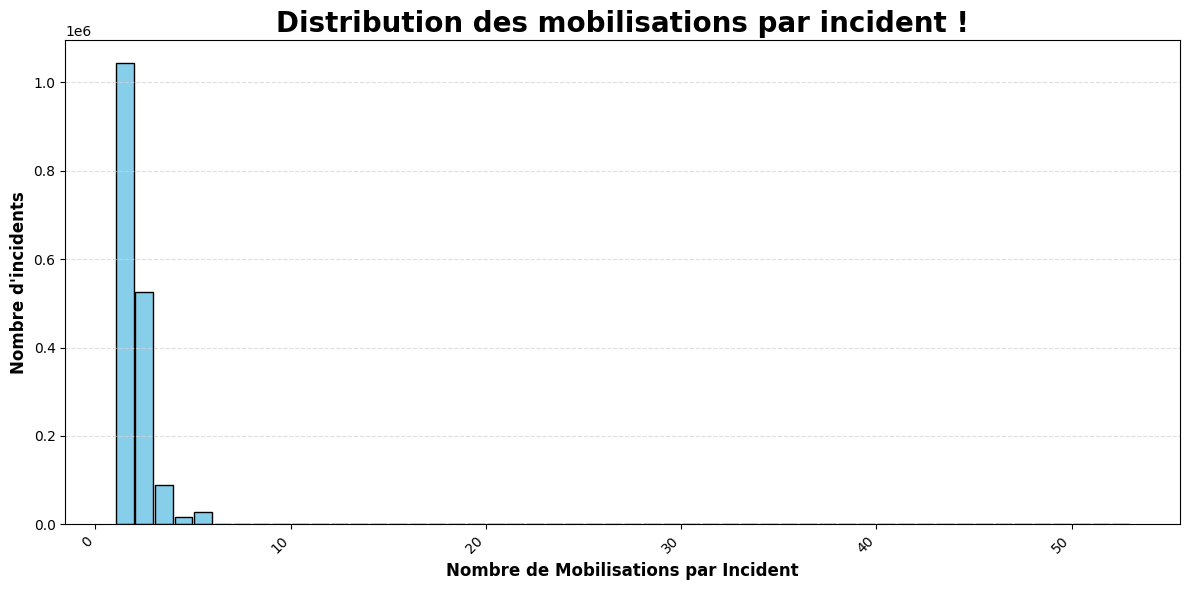

Statistiques descriptives sur les mobilisations par incident :


count    1.703375e+06
mean     1.513628e+00
std      8.042501e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+01
dtype: float64

Nombre dincidents avec 1 mobilisation: 1043003
Nombre dincidents avec 2  mobilisations: 524676
Nombre dincidents avec >5 mobilisations: 1708


In [27]:
# Visualisation de la distribution des mobilisations par incident
mobilisations_per_incident = df_mobilisations.groupby('IncidentNumber_clean').size()

plt.figure(figsize=(12, 6))
mobilisations_per_incident.plot(kind='hist', bins=range(1, mobilisations_per_incident.max() + 2), color='skyblue', edgecolor='black', rwidth=0.9)

plt.title("Distribution des mobilisations par incident !", fontsize=20, fontweight="bold")
plt.xlabel("Nombre de Mobilisations par Incident", fontsize=12, fontweight="bold")
plt.ylabel("Nombre d'incidents", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', alpha=0.75, linestyle='--', color='lightgrey')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout() 
plt.show()

# Statistiques descriptives sur les mobilisations par incident
print("Statistiques descriptives sur les mobilisations par incident :")
display(mobilisations_per_incident.describe())
print(f"Nombre dincidents avec 1 mobilisation: {sum(mobilisations_per_incident == 1)}")
print(f"Nombre dincidents avec 2  mobilisations: {sum(mobilisations_per_incident == 2)}")
print(f"Nombre dincidents avec >5 mobilisations: {sum(mobilisations_per_incident > 5)}")

In [28]:
# 1. S'assurer que DateOfCall est bien une date (sans heure)
df_inner["DateOfCall"] = pd.to_datetime(df_inner["DateOfCall"]).dt.date

# 2. Fusionner DateOfCall et TimeOfCall pour créer un datetime complet
df_inner["DateHeureOfCall"] = pd.to_datetime(df_inner["DateOfCall"].astype(str) + " " + df_inner["TimeOfCall"])

# 3. Calculer l'écart sous format HH:MM:SS
df_inner["ecart_arrivee_hms"] = (df_inner["DateAndTimeArrived"] - df_inner["DateHeureOfCall"]).astype("timedelta64[s]").apply(lambda x: pd.to_timedelta(x, unit='s'))

# 4. Affichage
df_inner[["DateHeureOfCall", "DateAndTimeMobilised", "DateAndTimeArrived", "ecart_arrivee_hms"]].head(30)


,DateHeureOfCall,DateAndTimeMobilised,DateAndTimeArrived,ecart_arrivee_hms
0,2009-01-01 00:00:37,2009-01-01 00:02:00,2009-01-01 00:07:00,0 days 00:06:23
1,2009-01-01 00:00:37,2009-01-01 00:02:00,2009-01-01 00:08:00,0 days 00:07:23
2,2009-01-01 00:03:00,2009-01-01 00:04:00,2009-01-01 00:09:00,0 days 00:06:00
3,2009-01-01 00:04:27,2009-01-01 00:04:00,2009-01-01 00:08:00,0 days 00:03:33
4,2009-01-01 00:05:39,2009-01-01 00:06:00,2009-01-01 00:09:00,0 days 00:03:21
5,2009-01-01 00:05:39,2009-01-01 00:06:00,2009-01-01 00:10:00,0 days 00:04:21
6,2009-01-01 00:06:03,2009-01-01 00:06:00,2009-01-01 00:09:00,0 days 00:02:57
7,2009-01-01 00:06:03,2009-01-01 00:06:00,2009-01-01 00:10:00,0 days 00:03:57
8,2009-01-01 00:12:31,2009-01-01 00:13:00,2009-01-01 00:22:00,0 days 00:09:29
9,2009-01-01 00:13:42,2009-01-01 00:14:00,2009-01-01 00:19:00,0 days 00:05:18


In [32]:
# Détection des anomalies temporelles
# Comparaison de DateAndTimeOfCall avec DateAndTimeMobilised
anomalies = df_inner[df_inner['DateAndTimeMobilised'] < df_inner['DateHeureOfCall']]

print("Nombre d'anomalies temporelles (mobilisation avant l'incident) :", anomalies.shape[0])
total_incidents = df_inner.shape[0]

if total_incidents > 0:
    percentage_anomalies = (anomalies.shape[0] / total_incidents) * 100
    print(f"Pourcentage d'anomalies temporelles : {percentage_anomalies:.2f}%")
else:
    print("Aucun incident à analyser pour calculer le pourcentage.")
# --- Fin du nouveau code ---

if anomalies.shape[0] > 0:
    print("Exemples d'anomalies temporelles :")
    # Vérifiez les colonnes disponibles dans anomalies
    print("Colonnes disponibles dans anomalies :", anomalies.columns.tolist())
    # Assurez-vous que 'Normalized_IncidentNumber' est le bon nom de colonne
    display(anomalies[['IncidentNumber_clean', 'DateHeureOfCall', 'DateAndTimeMobilised']])

# Afficher les premières lignes du DataFrame fusionné
display(df_inner.head())

Nombre d'anomalies temporelles (mobilisation avant l'incident) : 1087701
Pourcentage d'anomalies temporelles : 42.59%
Exemples d'anomalies temporelles :
Colonnes disponibles dans anomalies : ['IncidentNumber_incident', 'DateOfCall', 'CalYear_incident', 'TimeOfCall', 'HourOfCall_incident', 'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full', 'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode', 'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m', 'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS', 'IncidentStationGround', 'FirstPumpArriving_AttendanceTime', 'FirstPumpArriving_DeployedFromStation', 'SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded', 'NotionalCost', 'NumCalls', 'IncidentNumber_clean', 

,IncidentNumber_clean,DateHeureOfCall,DateAndTimeMobilised
3,3091,2009-01-01 00:04:27,2009-01-01 00:04:00
6,6091,2009-01-01 00:06:03,2009-01-01 00:06:00
7,6091,2009-01-01 00:06:03,2009-01-01 00:06:00
19,22091,2009-01-01 00:25:18,2009-01-01 00:25:00
20,23091,2009-01-01 00:26:20,2009-01-01 00:26:00
...,...,...,...
2539074,036717-03032025,2025-03-03 23:27:20,2025-03-03 23:27:00
2539075,036718-03032025,2025-03-03 23:28:13,2025-03-03 23:28:00
2539076,036718-03032025,2025-03-03 23:28:13,2025-03-03 23:28:00
2539077,036720-03032025,2025-03-03 23:37:40,2025-03-03 23:37:00


,IncidentNumber_incident,DateOfCall,CalYear_incident,TimeOfCall,HourOfCall_incident,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateHeureOfCall,ecart_arrivee_hms
0,235138081.00,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN,2009-01-01 00:00:37,0 days 00:06:23
1,235138081.00,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,<NA>,NaN,2009-01-01 00:00:37,0 days 00:07:23
2,2091.00,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN,2009-01-01 00:03:00,0 days 00:06:00
3,3091.00,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN,2009-01-01 00:04:27,0 days 00:03:33
4,5091.00,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,<NA>,NaN,2009-01-01 00:05:39,0 days 00:03:21


In [33]:
# Étape 1 : Créer une colonne timedelta complète entre DateAndTimeArrived et DateHeureOfCall
df_inner["ecart_arrivee_timedelta"] = df_inner["DateAndTimeLeft"] - df_inner["DateHeureOfCall"]

# Étape 2 : Identifier les Timedelta négatifs
negative_delays = df_inner[df_inner["ecart_arrivee_timedelta"] < pd.Timedelta(0)]

# Étape 3 : Vérification et affichage
if not negative_delays.empty:
    print("ATTENTION : Des écarts négatifs ont été trouvés entre DateAndTimeArrived et DateHeureOfCall !")
    print(f"Nombre de lignes avec un écart négatif : {len(negative_delays)}")
    print("Exemples de lignes avec un écart négatif :")
    print(negative_delays[["DateHeureOfCall", "DateAndTimeArrived", "ecart_arrivee_timedelta"]].head())
    
    # Détail sur les jours négatifs
    jours_negatifs = negative_delays["ecart_arrivee_timedelta"].dt.days.lt(0).sum()
    print(f"\nNombre de jours négatifs : {jours_negatifs}")
else:
    print("Aucun écart négatif trouvé entre DateAndTimeArrived et DateHeureOfCall. Les données sont cohérentes.")

# Étape 4 : Extraire HH:MM:SS même si l'écart contient un 'days' négatif
df_inner["ecart_arrivee_hms"] = df_inner["ecart_arrivee_timedelta"].apply(lambda x: str(x).split()[-1] if 'day' in str(x) else str(x))

# Étape 5 : Pourcentage de cas avec écarts négatifs
pourcentage_negatif = (len(negative_delays) / len(df_inner)) * 100
print(f"\nPourcentage d'incidents avec des écarts négatifs : {pourcentage_negatif:.2f}%")

# Étape 6 : Affichage final
print("\nExtrait des données avec HH:MM:SS :")
display(df_inner[["DateHeureOfCall", "DateAndTimeArrived", "ecart_arrivee_hms"]].head())


ATTENTION : Des écarts négatifs ont été trouvés entre DateAndTimeArrived et DateHeureOfCall !
Nombre de lignes avec un écart négatif : 761929
Exemples de lignes avec un écart négatif :
          DateHeureOfCall DateAndTimeArrived ecart_arrivee_timedelta
14840 2009-01-31 23:36:00                NaT      -30 days +00:45:00
14841 2009-01-31 23:36:00                NaT      -30 days +00:48:00
14843 2009-01-31 23:47:05                NaT      -30 days +01:55:55
14844 2009-01-31 23:47:05                NaT      -30 days +01:57:55
14845 2009-01-31 23:47:30                NaT      -30 days +00:25:30

Nombre de jours négatifs : 761929

Pourcentage d'incidents avec des écarts négatifs : 29.83%

Extrait des données avec HH:MM:SS :


,DateHeureOfCall,DateAndTimeArrived,ecart_arrivee_hms
0,2009-01-01 00:00:37,2009-01-01 00:07:00,00:15:23
1,2009-01-01 00:00:37,2009-01-01 00:08:00,00:11:23
2,2009-01-01 00:03:00,2009-01-01 00:09:00,00:13:00
3,2009-01-01 00:04:27,2009-01-01 00:08:00,00:15:33
4,2009-01-01 00:05:39,2009-01-01 00:09:00,00:05:21


In [37]:
# 0. Définir la date limite
date_limite = pd.to_datetime("2025-03-31")

# 1. Identifier les colonnes de type datetime dans df_inner
colonnes_datetime = df_inner.select_dtypes(include=["datetime", "datetimetz"]).columns

# 2. Filtrer les lignes où toutes les dates sont <= 2025-03-31
masque_valide = (df_inner[colonnes_datetime] <= date_limite).all(axis=1)
df_inner_filtré = df_inner[masque_valide].copy()

#quelle est la taille de df_inner apres filtrage:
print(f"Taille de df_inner avant filtrage : {df_inner.shape[0]} lignes")
print(f"Taille de df_inner après filtrage jusqu'au 31 mars 2025 : {df_inner_filtré.shape[0]} lignes")
print(f"Pourcentage de lignes conservées après filtrage : {len(df_inner_filtré) / len(df_inner) * 100:.2f}%")


# 3. Recalculer le timedelta après filtrage
df_inner_filtré["ecart_arrivee_timedelta"] = (df_inner_filtré["DateAndTimeArrived"] - df_inner_filtré["DateHeureOfCall"]).dt.total_seconds().apply(lambda x: pd.Timedelta(seconds=x))

# 4. Identifier les délais négatifs
negative_delays = df_inner_filtré[df_inner_filtré["ecart_arrivee_timedelta"] < pd.Timedelta(0)]

# 5. Analyse
if not negative_delays.empty:
    print("ATTENTION : Des écarts négatifs ont été trouvés entre DateAndTimeArrived et DateHeureOfCall !")
    print(f"Nombre de lignes avec un écart négatif : {len(negative_delays)}")
    print("Exemples de lignes avec un écart négatif :")
    print(negative_delays[["DateHeureOfCall", "DateAndTimeArrived", "ecart_arrivee_timedelta"]].head())
    
    jours_negatifs = negative_delays["ecart_arrivee_timedelta"].dt.days.lt(0).sum()
    print(f"\nNombre de jours négatifs : {jours_negatifs}")
else:
    print("Aucun écart négatif trouvé entre DateAndTimeArrived et DateHeureOfCall. Les données sont cohérentes.")

# 6. Extraire HH:MM:SS
df_inner_filtré["ecart_arrivee_hms"] = df_inner_filtré["ecart_arrivee_timedelta"].apply(
    lambda x: str(x).split()[-1] if 'day' in str(x) else str(x)
)

# 7. Pourcentage de cas négatifs
pourcentage_negatif = (len(negative_delays) / len(df_inner_filtré)) * 100
print(f"\nPourcentage d'incidents avec des écarts négatifs (données filtrées jusqu'au 31 mars 2025) : {pourcentage_negatif:.2f}% de {len(df_inner_filtré)} incidents")

# 8. Affichage
print("\n Extrait des données filtrées avec HH:MM:SS :")
display(df_inner_filtré[["DateHeureOfCall", "DateAndTimeArrived", "ecart_arrivee_hms"]].head())


Taille de df_inner avant filtrage : 2553955 lignes
Taille de df_inner après filtrage jusqu'au 31 mars 2025 : 360518 lignes
Pourcentage de lignes conservées après filtrage : 14.12%
ATTENTION : Des écarts négatifs ont été trouvés entre DateAndTimeArrived et DateHeureOfCall !
Nombre de lignes avec un écart négatif : 185010
Exemples de lignes avec un écart négatif :
          DateHeureOfCall  DateAndTimeArrived ecart_arrivee_timedelta
14850 2009-02-01 00:01:04 2009-01-02 00:09:00      -30 days +00:07:56
14851 2009-02-01 00:01:35 2009-01-02 00:08:00      -30 days +00:06:25
14852 2009-02-01 00:01:35 2009-01-02 00:09:00      -30 days +00:07:25
14853 2009-02-01 00:01:38 2009-01-02 00:07:00      -30 days +00:05:22
14854 2009-02-01 00:01:38 2009-01-02 00:07:00      -30 days +00:05:22

Nombre de jours négatifs : 185010

Pourcentage d'incidents avec des écarts négatifs (données filtrées jusqu'au 31 mars 2025) : 51.32% de 360518 incidents

 Extrait des données filtrées avec HH:MM:SS :


,DateHeureOfCall,DateAndTimeArrived,ecart_arrivee_hms
1,2009-01-01 00:00:37,2009-01-01 00:08:00,00:07:23
2,2009-01-01 00:03:00,2009-01-01 00:09:00,00:06:00
3,2009-01-01 00:04:27,2009-01-01 00:08:00,00:03:33
4,2009-01-01 00:05:39,2009-01-01 00:09:00,00:03:21
6,2009-01-01 00:06:03,2009-01-01 00:09:00,00:02:57



Début de l'investigation des 761929 écarts négatifs entre DateOfCall et DateAndTimeArrived.


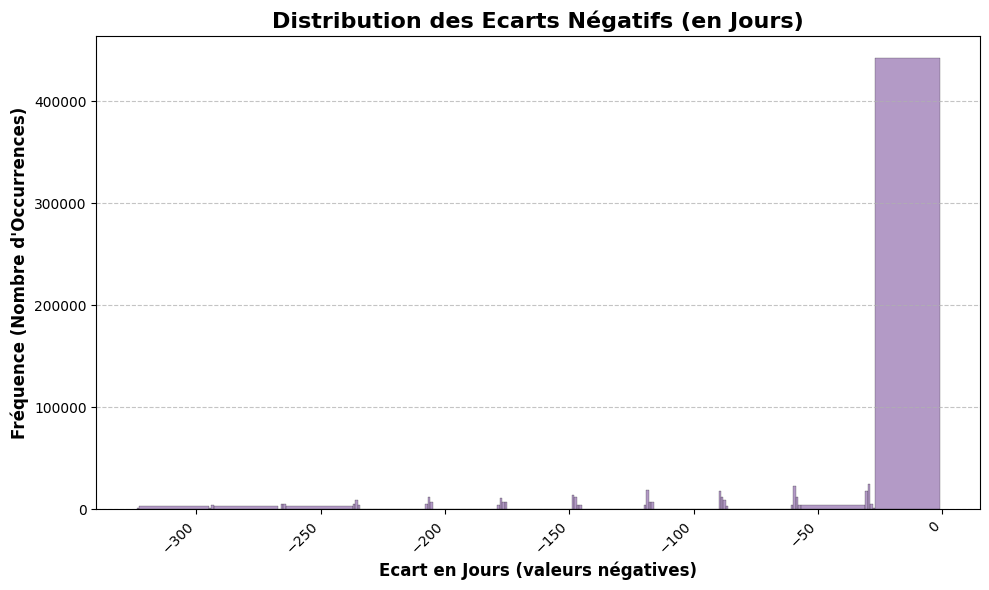


Résumé des Jours d'Ecart Négatifs 
ecart_arrivee_days
-324      1257
-323      3490
-295      1230
-294      4280
-293      3621
-267         1
-266      5826
-265      4901
-264      3390
-237      5745
-236      9532
-235      3998
-234       224
-208      5028
-207     12201
-206      7348
-205       469
-204         1
-179      4598
-178     11373
-177      7079
-176      7749
-175       497
-149     13926
-148     11894
-147      4680
-146      4330
-145       286
-120      4616
-119     19414
-118      7792
-117      6972
-116       478
-90      18499
-89      12270
-88       9075
-87       3656
-86        190
-61       4657
-60      23115
-59      11897
-58       4361
-57       4275
-31      18469
-30      24681
-29       5446
-28       1084
-27       4073
-1      437955
Name: count, dtype: int64

 Exemples détaillés de DateOfCall vs DateAndTimeArrived pour des écarts négatifs 
         DateOfCall  DateAndTimeArrived ecart_arrivee_timedelta
2254696  2023-09-28 2023-09-28 09:13:

AttributeError: Can only use .dt accessor with datetimelike values

In [35]:

import seaborn as sns 
# Visualisation de la distribution des écarts négatifs
negative_delays = df_inner[df_inner["ecart_arrivee_timedelta"] < pd.Timedelta(0)].copy()

if negative_delays.empty:
    print("Aucun écart négatif à investiguer. Les données sont déjà propres ou l'erreur n'existe plus.")
else:
    print(f"\nDébut de l'investigation des {len(negative_delays)} écarts négatifs entre DateOfCall et DateAndTimeArrived.")

    # 1. Distribution de l'amplitude des retards négatifs 
    negative_delays['ecart_arrivee_days'] = negative_delays['ecart_arrivee_timedelta'].dt.days 

    plt.figure(figsize=(10, 6))
    sns.histplot(negative_delays['ecart_arrivee_days'], bins=sorted(negative_delays['ecart_arrivee_days'].unique()), kde=False, color='#9a78b3', edgecolor='black')
    plt.title('Distribution des Ecarts Négatifs (en Jours)', fontsize=16, fontweight="bold")
    plt.xlabel('Ecart en Jours (valeurs négatives)', fontsize=12, fontweight="bold")
    plt.ylabel('Fréquence (Nombre d\'Occurrences)', fontsize=12, fontweight="bold")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75, linestyle='--')
    plt.tight_layout()
    plt.show()

    print("\nRésumé des Jours d'Ecart Négatifs ")
    print(negative_delays['ecart_arrivee_days'].value_counts().sort_index())

    # 2. Inspection des paires de dates brutes et recherche de patterns 
    print("\n Exemples détaillés de DateOfCall vs DateAndTimeArrived pour des écarts négatifs ")
    sample_size = min(20, len(negative_delays)) 
    sample_negative_delays = negative_delays[['DateOfCall', 'DateAndTimeArrived', 'ecart_arrivee_timedelta']].sample(sample_size, random_state=42) 
    print(sample_negative_delays)
    print("\nObservation : Y a-t-il des inversions évidentes de jour/mois ou des années incohérentes ?")

    # Analyser les mois et jours pour identifier les inversions possibles
    negative_delays['DoC_month'] = negative_delays['DateOfCall'].dt.month
    negative_delays['DoC_day'] = negative_delays['DateOfCall'].dt.day
    negative_delays['DtAA_month'] = negative_delays['DateAndTimeArrived'].dt.month
    negative_delays['DtAA_day'] = negative_delays['DateAndTimeArrived'].dt.day

    # Compter les paires de (Mois_appel, Jour_appel) vs (Mois_arrivée, Jour_arrivée)
    print("\nPaires (Mois-Jour Appel) vs (Mois-Jour Arrivée) les plus courantes pour les écarts négatifs ")
    date_pair_counts = negative_delays.groupby([
        negative_delays['DateOfCall'].dt.strftime('%Y-%m-%d'),
        negative_delays['DateAndTimeArrived'].dt.strftime('%Y-%m-%d')
    ]).size().sort_values(ascending=False).head(10)
    print(date_pair_counts)
    print("\nObservation : Rechercher si certaines paires de dates brutes se répètent très souvent.")


    # 3. Analyse des patterns temporels par CalYear 
    if 'CalYear_incident' in negative_delays.columns:
        print("\nDistribution des Ecarts Négatifs par Année (CalYear_incident)")
        errors_by_year = negative_delays['CalYear_incident'].value_counts().sort_index()
        print(errors_by_year)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=errors_by_year.index, y=errors_by_year.values, palette='viridis')
        plt.title('Nombre d\'Ecarts Négatifs par Année', fontsize=16, fontweight="bold")
        plt.xlabel('Année Calendaire', fontsize=12, fontweight="bold")
        plt.ylabel('Nombre d\'Erreurs', fontsize=12, fontweight="bold")
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.75, linestyle='--')
        plt.tight_layout()
        plt.show()
        print("\nObservation : Le problème est-il concentré sur certaines années ?")
    else:
        print("\n'CalYear_incident' (ou équivalent) non trouvé dans les colonnes des écarts négatifs. Vérifiez le nom de la colonne après la jointure.")


    # 4. Analyse par catégories (IncidentGroup, Station, Borough) 
    print("\nAnalyse des Ecarts Négatifs par Catégorie ")

    # IncidentGroup
    if 'IncidentGroup' in negative_delays.columns:
        print("\nTop 10 des Groupes d'Incidents avec Ecarts Négatifs :")
        print(negative_delays['IncidentGroup'].value_counts().head(10))
        print("\nObservation : Certains types d'incidents sont-ils plus susceptibles d'avoir cette erreur ?")
    else:
        print("\n'IncidentGroup' non trouvé dans les écarts négatifs.  le nom de la colonne après la jointure.")

    # DeployedFromStation_Name ( de mobilisations)
    if 'DeployedFromStation_Name' in negative_delays.columns:
        print("\nTop 10 des Stations d'où proviennent les Ecarts Négatifs :")
        print(negative_delays['DeployedFromStation_Name'].value_counts().head(10))
        print("\nObservation : Y a-t-il des stations spécifiques qui génèrent plus d'erreurs ?")
    else:
        print("\n'DeployedFromStation_Name' non trouvé dans les écarts négatifs. Le nom de la colonne après la jointure.")

    # BoroughName 
    if 'BoroughName_incident' in negative_delays.columns: 
        print("\nTop 10 des Boroughs avec Ecarts Négatifs :")
        print(negative_delays['BoroughName_incident'].value_counts().head(10))
        print("\nObservation : Des zones géographiques spécifiques sont-elles concernées ?")
    elif 'BoroughName_mobilisation' in negative_delays.columns:
         print("\nTop 10 des Boroughs avec Ecarts Négatifs :")
         print(negative_delays['BoroughName_mobilisation'].value_counts().head(10))
    else:
        print("\n'BoroughName' non trouvé dans les écarts négatifs. Vérifiez le nom de la colonne après la jointure.")


Un problèmeressort de l’analyse des dates : certains enregistrements indiquent qu’un camion de pompiers serait arrivé **avant même que l’appel d’urgence n’ait été passé**. Les dates d’arrivée précèdent parfois celles de l’appel… ce qui est bien sûr impossible !

En regardant de plus près, il semble qu’une **confusion récurrente entre le jour du mois et le  29eme ou 30 eme jr du mois soit à l’origine de ces incohérences. Comme si, par exemple, une date saisie comme "le 2 juillet" avait été interprétée comme "le 9 février". Résultat : des écarts de -29 ou -30 jours, voire plusieurs mois d’avance, apparaissent dans les données.

*Ce type d’anomalie concerne principalement les années antérieures à 2021. À partir de cette date, le problème devient beaucoup plus rare, ce qui suggère qu’une "correction ou un changement de procédure"a été mis en place, améliorant significativement la qualité des données plus récentes.

==> Mettre de côté ces données négatives pour la modélisation !


In [ ]:
'''# 1. Identifier les données avec des écarts négatifs
negative_delays_df = df_inner[df_inner["ecart_arrivee_timedelta"] < pd.Timedelta(0)].copy()

# 2. Créer le DataFrame avec les données cohérentes (écarts positifs ou nuls)
df_inner_cleaned_time = df_inner[df_inner["ecart_arrivee_timedelta"] >= pd.Timedelta(0)].copy()

# Affichage des résultats pour confirmation
print(f"Taille totale du DataFrame original (df_inner) : {len(df_inner)} lignes")
print(f"Taille du DataFrame avec des écarts négatifs (negative_delays_df) : {len(negative_delays_df)} lignes")
print(f"Taille du DataFrame avec des écarts cohérents (df_inner_cleaned_time) : {len(df_inner_cleaned_time)} lignes")

# Vérification que la somme des deux nouveaux DataFrames correspond à l'original
if len(negative_delays_df) + len(df_inner_cleaned_time) == len(df_inner):
    print("La séparation a été effectuée correctement : la somme des lignes est égale au total original.")
else:
    print("ATTENTION : Il y a un déséquilibre dans la séparation des données.")

print(" Premières lignes du DataFrame avec les données cohérentes (écarts positifs ou nuls) ")
print(df_inner_cleaned_time[["DateOfCall", "DateAndTimeArrived", "ecart_arrivee_timedelta"]].head())

print("Premières lignes du DataFrame avec les données incohérentes (écarts négatifs) ")
print(negative_delays_df[["DateOfCall", "DateAndTimeArrived", "ecart_arrivee_timedelta"]].head())

# Sauvegarder les données incohérentes dans un fichier pour examen ultérieur
negative_delays_df.to_csv("ecarts_negatifs_incidents.csv", index=False)
print("Les lignes avec des écarts négatifs ont été sauvegardées dans 'ecarts_negatifs_incidents.csv'")'''

In [55]:
df_inner["ecart_arrivee_hms"].describe()

count     2553955
unique       2881
top           NaT
freq      1106003
Name: ecart_arrivee_hms, dtype: object

In [ ]:
df_inner[df_inner["ecart_arrivee_hms"] < 0].shape[0]

TypeError: '<' not supported between instances of 'str' and 'int'

In [50]:
df_inner[df_inner["ecart_arrivee_hms"] < 0][["DateOfCall", "DateAndTimeArrived", "IncidentNumber_clean"]].sample(10)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
df_inner[df_inner["ecart_arrivee_hrs"] < 0]["CalYear_incident"].value_counts().sort_index()

KeyError: 'ecart_arrivee_hrs'

In [39]:
df_inner[df_inner["ecart_arrivee_hrs"] < 0]["CalYear_mobilisation"].value_counts().sort_index()

KeyError: 'ecart_arrivee_hrs'

In [40]:
# Sauvegarde du résultat du df join standardisé
output_path = "../../data/" 
df_inner.to_csv(f"{output_path}df_inner_join_successful.csv", index=False)
print(f"Jointure INNER sauvegardée dans : {output_path}df_inner_join_successful.csv")

Jointure INNER sauvegardée dans : ../../data/df_inner_join_successful.csv


_______________________________________________________________________________OUTER___________________________________________________________________________________________

In [68]:
# Jointure OUTER complète
df_merge = df_incidents.merge(
    df_mobilisations,
    how="outer",
    on="IncidentNumber_clean",
    suffixes=("_incident", "_mobilisation"),
    indicator=True
)

In [69]:
# Extraction des cas selon le type de correspondance
df_outer = df_merge.copy()  # → Jointure OUTER complète     
df_left_only = df_merge[df_merge["_merge"] == "left_only"].copy()  # Incidents sans mobilisation
df_right_only = df_merge[df_merge["_merge"] == "right_only"].copy()# Mobilisations sans incident

# Affichage
print(f"Jointure OUTER complète : {df_outer.shape[0]} lignes")
print(f"→ Appariements (INNER) : {df_inner_from_outer.shape[0]} lignes")
print(f"→ Incidents sans mobilisation : {df_left_only.shape[0]} lignes")
print(f"→ Mobilisations sans incident : {df_right_only.shape[0]} lignes")

MemoryError: Unable to allocate 2.69 GiB for an array with shape (36, 10043305) and data type object

In [ ]:
'''output_path = "../../data/"
df_outer.to_csv("../../data/df_jointure_outer.csv", index=False)
df_left_only.to_csv(f"{output_path}df_incidents_without_mobilisations.csv", index=False)
df_right_only.to_csv(f"{output_path}df_mobilisations_without_incidents.csv", index=False)
print("Fichiers de jointure sauvegardés dans :", output_path)
print("Nettoyage et jointure des données terminés avec succès.")'''

NameError: name 'df_inner_valid_times' is not defined